# Preprocessing & EDA on Users

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

users = pd.read_csv('../data_raw/BX-Users.csv')

## 1. Data Overview

In [74]:
# Index(['User-ID', 'Location', 'Age'], dtype='object')
# 출신 지역정보와 나이 정보 제공

print(users.columns)
users.head()

Index(['User-ID', 'Location', 'Age'], dtype='object')


,User-ID,Location,Age
0,183,"porto, porto, portugal",27.0
1,242,"neuffen, baden-wuerttemberg, germany",37.0
2,254,"minneapolis, minnesota, usa",24.0
3,388,"nashville, tennessee, usa",35.0
4,392,"barcelona, catalunya, spain",44.0


In [75]:
# Unique Users 명수: 5157명

len(users['User-ID'].unique())

5157

## 2. EDA on Age

count    5157.000000
mean       34.983324
std        13.848990
min         0.000000
25%        26.000000
50%        33.000000
75%        41.000000
max       244.000000
Name: Age, dtype: float64

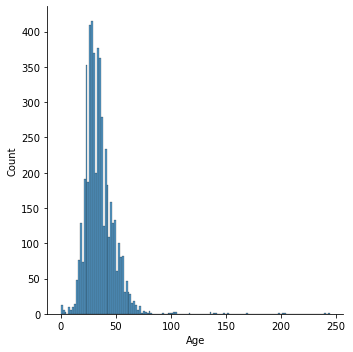

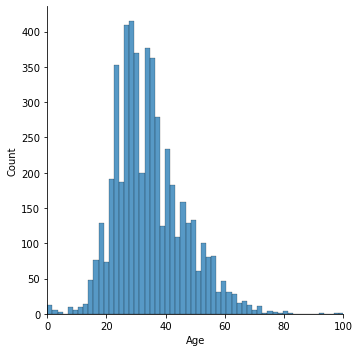

In [77]:
# Users 연령 분포 체크

display(users['Age'].describe())
display(sns.displot(users['Age']))
age = sns.displot(users['Age']).set(xlim=(0, 100))
plt.show(age)

In [64]:
# 연령 관련 Outlier 체크

## Users 중 Age가 6살 미만인 사용자들이 21명 존재함
## Users 중 Age가 100 초과인 사용자들이 18명 존재함
## Age null 값은 없음

print(len(users[users['Age']<6]))
print(len(users[users['Age']>100]))
print((users['Age'].isna().sum()))
display(users[users['Age']<6])
display(users[users['Age']>100])

21
18
0


,User-ID,Location,Age,Country
374,20845,"berlin, berlin, germany",0.0,germany
375,20851,"l�beck, schleswig-holstein, germany",0.0,germany
378,20859,"t�bingen, baden-w�rttemberg, germany",0.0,germany
442,24462,"barcelona, catalunya, spain",1.0,spain
615,34521,"m�nsingen, bern, switzerland",2.0,switzerland
1676,91478,"mountain view, california, usa",0.0,usa
1762,96473,"t�bingen, baden-w�rttemberg, germany",4.0,germany
1764,96496,"sault ste. marie, ontario, canada",0.0,canada
2184,119749,"omaha, nebraska, usa",5.0,usa
2205,120860,"huntsville, alabama, usa",2.0,usa


,User-ID,Location,Age,Country
152,8782,"calgary, alberta, canada",239.0,canada
218,13273,"harrisburg, pennsylvania, usa",201.0,usa
372,20688,"gav�, barcelona (catalunya), spain",104.0,spain
376,20857,"stuttgart, baden-wuerttemberg, germany",244.0,germany
1274,71800,"sunnyvale, california, usa",136.0,usa
1373,76482,"zanesville, ohio, usa",103.0,usa
1659,90766,"rangoon, rangoon, burma",136.0,burma
1768,96714,"ponte vedra, festa da l�ngua, galiza",141.0,galiza
1875,101668,"stuttgart, baden-wuerttemberg, germany",151.0,germany
2178,119282,"chicago, illinois, usa",168.0,usa


## 3. Preprocessing on "Location"

In [34]:
# Users 출신지 분포 체크

display(users['Location'].describe())
display(users['Location'].value_counts()[:20])

count                         5157
unique                        2748
top       toronto, ontario, canada
freq                            48
Name: Location, dtype: object

toronto, ontario, canada               48
hamburg, hamburg, germany              48
madrid, madrid, spain                  45
barcelona, catalunya, spain            38
berlin, berlin, germany                35
portland, oregon, usa                  34
paris, ile de france, france           32
chicago, illinois, usa                 32
ottawa, ontario, canada                31
sydney, new south wales, australia     27
minneapolis, minnesota, usa            25
austin, texas, usa                     24
san diego, california, usa             23
london, england, united kingdom        23
m�nchen, bayern, germany               23
seattle, washington, usa               22
barcelona, barcelona, spain            22
vancouver, british columbia, canada    21
new york, new york, usa                21
san francisco, california, usa         20
Name: Location, dtype: int64

In [39]:
# 원본 Users 데이터에 출신국가 column 별도로 추가

country_lst = [loc_info.split(',')[-1].strip() for loc_info in users['Location'].values]
users['Country'] = country_lst
users.to_csv('../data_new/users_with_country.csv', encoding='utf-8', index=False)

In [59]:
# Country 정보가 없는 Users(9명)에 대해 country 정보 수동으로 추가

users_no_country = users_with_country[users_with_country['Country'].isna()]['Location'].index
no_country_lst = users_with_country[users_with_country['Country'].isna()]['Location'].values
add_country = ['usa', 'usa', 'usa', 'usa', 'canada', 'usa', 'australia', 'france', 'usa']
new_country_info = [f"{origin_info} {add}" for origin_info, add in zip(no_country_lst, add_country)]

users_with_country.loc[users_no_country, 'Location'] = new_country_info
users_with_country.loc[users_no_country, 'Country'] = add_country

users_with_country.to_csv('../data_new/users_with_country.csv', encoding='utf-8', index=False)

## 4. EDA on Country

usa               2719
germany            681
canada             398
spain              363
united kingdom     210
france             199
australia          108
switzerland         94
portugal            68
italy               49
austria             46
netherlands         41
malaysia            35
new zealand         14
finland             14
Name: Country, dtype: int64

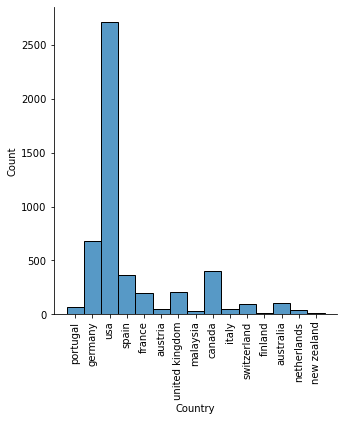

In [85]:
# 출신국가 분포 체크

users = pd.read_csv('../data_new/users_with_country.csv')
display(users['Country'].value_counts()[:15])

country_top15 = users['Country'].value_counts()[:15].index
users_from_country_top15 = users[users['Country'].isin(country_top15)]
ax = sns.displot(users_from_country_top15['Country'])
ax.set_xticklabels(rotation=90)
plt.show()

In [71]:
# 총 63개국 Users 데이터임

len(users['Country'].unique())

63